## Markovian representation of Fractional Brownian Motion

Mandelbrot-van Ness representation:
$$
W_{t}^{H} = W_{0}^{H} + \frac{1}{\Gamma(H+\frac{1}{2})}\bigg(\int_{0}^{t}(t-s)^{H - \frac{1}{2}}dW_{s} + 
\int_{-\infty}^{0}(t-s)^{H - \frac{1}{2}} - (-s)^{H - \frac{1}{2}}dW_{s}\bigg)
$$

Fractional kernal:
$$
K(t) = \frac{t^{H - \frac{1}{2}}}{\Gamma(H + \frac{1}{2})} 
$$

Laplacian representation of fractional kernal:
$$
K(t) = \int_{0}^{\infty}e^{-\gamma t}\mu(d\gamma), \quad \mu(d\gamma) = \frac{\gamma^{-H-\frac{1}{2}}}{\Gamma(H + \frac{1}{2})\Gamma(\frac{1}{2} - H)}d\gamma
$$

By Stochastic Fubini theorem:
$$
W_{t}^{H} = W_{0}^{H} + \int_{0}^{\infty}(e^{-\gamma t}-1)\int_{-\infty}^{0}e^{\gamma s}dW_{s}\mu(d\gamma) + 
\int_{0}^{\infty}\int_{0}^{t}e^{\gamma(s-t)}dW_{s}\mu(d\gamma)
$$

Consider OU processes
$$
Y_{t}^{\gamma} = e^{-\gamma t}Y_{0}^{\gamma} + \int_{0}^{t}e^{-\gamma(t-s)}dW_{s}
$$
$$
Y_{0}^{\gamma} = \int_{-\infty}^{0}e^{\gamma s}dW_{s} \sim \mathcal{N}(0,\frac{1}{2\gamma})
$$
satisfying the following SDE
$$
dY_{t} = -\gamma Y_{t}dt + dW_{t}
$$

Therefore
$$
W_{t}^{H} = W_{0}^{H} + \int_{0}^{\infty}(Y_{t}^{\gamma} - Y_{0}^{\gamma})\mu(d\gamma)
$$

Note that $(Y_{0}^{\gamma})_{\gamma \geq 0}$ are not independent but with correlation 
$$
\mathbb{E}[Y_{0}^{x} Y_{0}^{y}] = \frac{1}{x+y}, \quad \text{Cov}(Y_{0}^{x},Y_{0}^{y}) = \frac{2\sqrt{xy}}{x+y}
$$


## Discretized approximation
Space discretization $0 = \eta_{0}^{n} \leq \eta_{1}^{n} \leq \cdots \leq \eta_{n}^{n}$ and $\gamma_{i}^{n} \in [\eta_{i}^{n},\eta_{i+1}^{n}]$

 [\\]:$$c_{i}^{n} = \frac{1}{\Gamma(H + \frac{1}{2})\Gamma(\frac{1}{2} - H)}\int_{\eta_{i}^{n}}^{\eta_{i+1}^{n}}\gamma^{-H-\frac{1}{2}}d\gamma$$

$$
c_{i}^{n} = \int_{\eta_{i}^{n}}^{\eta_{i+1}^{n}}\mu(d\gamma) = \frac{1}{\Gamma(H + \frac{1}{2})\Gamma(\frac{1}{2} - H)}\frac{1}{\frac{1}{2}-H}\gamma^{\frac{1}{2}-H}\Big|_{\eta_{i}^{n}}^{\eta_{i+1}^{n}}
$$


$$
\gamma_{i}^{n} = \frac{1}{c_{i}^{n}}\int_{\eta_{i}^{n}}^{\eta_{i+1}^{n}}\gamma\mu(d\gamma) = \frac{1}{\Gamma(H + \frac{1}{2})\Gamma(\frac{1}{2} - H)}\frac{1}{\frac{3}{2}-H}\gamma^{\frac{3}{2}-H}\Big|_{\eta_{i}^{n}}^{\eta_{i+1}^{n}}
$$

$$
\mu^{n}(d\gamma) = \sum_{i = 1}^{M}c_{i}^{n}\delta_{\gamma_{i}^{n}}
$$

$$
K^{n}(t) = \sum_{i=1}^{M}c_{i}^{n}e^{-\gamma_{i}^{n} t}
$$

Consider $\eta_{i}^{n} = i\pi_{i}^{n}, i = 1,\cdots,n $. For convergence considertion we hope $\eta_{i}^{n}$ satisfies 
$$
\eta_{n}^{n} \to \infty,\quad \pi_{n}^{\frac{5}{2} - H}n^{\frac{1}{2}-H} \to 0
$$

We choose
$$
\pi_{n} = \frac{n^{-\frac{1}{5}}}{T}\bigg(\frac{\sqrt{10}(1-2H)}{5-2H}\bigg)^{\frac{2}{5}}
$$



## 1. OU processs approximation (Euler Method)
Consider OU processes with $x \in \mathbb{R}$
$$ dY_{t}^{x} = -xY_{t}^{x}dt + dW_t $$

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pdb

In [184]:
def BM_generator(M,N,T, PLOT = True):
    np.random.seed(1)
    dt = T/N
    BM = np.zeros(shape = (M,N+1))
    for i in range(N):
        dW = np.random.normal(0,np.sqrt(dt),size = (M))
        BM[:,i+1] = BM[:,i] + dW
    if PLOT:
        plt.rcParams['figure.figsize'] = (12.0, 4.0)
        t_axis = np.arange(N+1)*dt
        for ii in range(M):
            plt.plot(t_axis,BM[ii,:])
        plt.plot(t_axis,t_axis)
        plt.grid()
        plt.show()

In [207]:
def fBM_generator(H, M, N, n, T, PLOT = True):
    np.random.seed(1)
    alpha = H + 0.5
    dt = T/N
    t_grid = np.arange(N+1)*dt
    dh = ((10*(1-2*H)**2)/(n*(5-2*H)**2))**(1/5)/T
    h_grid = np.arange(n+1)*dh
    h1_grid = h_grid**(0.5-H)
    h2_grid = h_grid**(1.5-H)
    c_grid = (h1_grid[1:] - h1_grid[:-1]) / (0.5-H) / math.gamma(H+0.5) / math.gamma(0.5-H)
    gamma_grid = (h2_grid[1:] - h2_grid[0:-1]) / c_grid / (1.5-H) / math.gamma(H+0.5) / math.gamma(0.5-H) 
    plt.scatter(gamma_grid,c_grid)
    plt.show()
    fBM = np.zeros(shape = (M,N+1))
    Y = np.zeros(shape = (M,N+1,n))
    multi_diffu = np.zeros(shape = (M,N+1,n+1))
    for it in range(N):
        dw =  np.random.normal(0,np.sqrt(dt),size = (M,1))
        dW = np.tile(dw,(1,n))
        Y[:,it+1,:] = Y[:,it,:] - gamma_grid * Y[:,it,:] * dt + dW
        z = np.sum(c_grid * Y[:,it+1,:], axis = -1)
        fBM[:,it+1] =  np.sum(c_grid * Y[:,it+1,:], axis = -1)
        multi_diffu[:,it+1,0] = fBM[:,it+1]
        multi_diffu[:,it+1,1:] = Y[:,it+1,:]
    if PLOT:
        plt.rcParams['figure.figsize'] = (12.0, 4.0)
        for i in range(M):
            plt.plot(t_grid,fBM[i,:])
        plt.plot(t_grid,t_grid)
        plt.grid()
        plt.show()
    return Y, fBM, multi_diffu

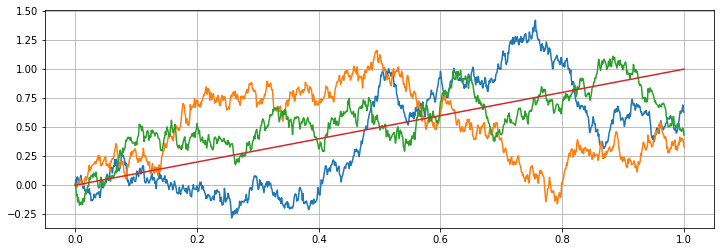

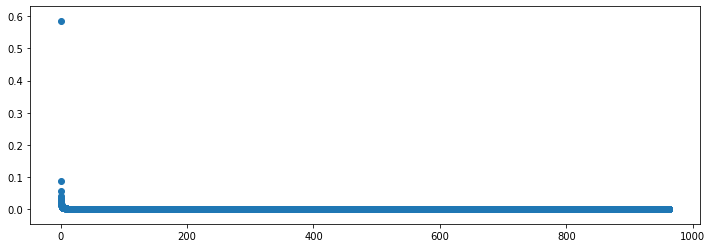

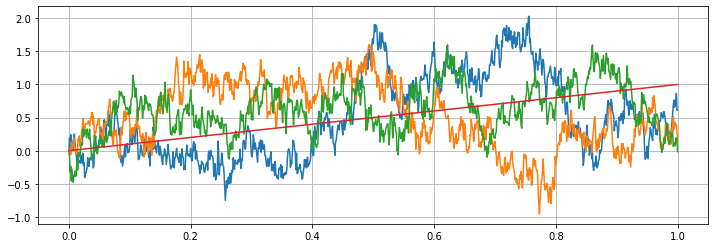

In [206]:
#### Simulation fBM with QV
BM_generator(3, 1000,1)
OU, fBM, multi_diffu = fBM_generator(0.3, 3, 1000, 10000, 1)

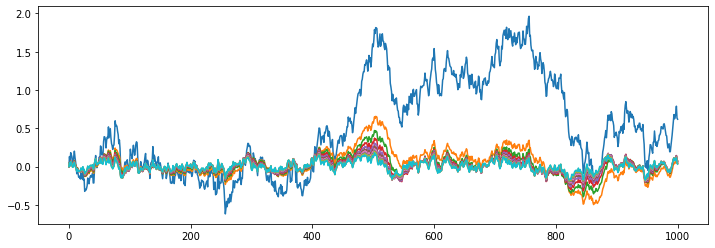

In [193]:
for i in range(10):
    plt.plot(np.arange(1001),multi_diffu[0,:,100*i])

In [1]:
def density_mu(x,H):
    return x**(-0.5-H) / math.gamma(H+0.5) / math.gamma(0.5-H)
grid = np.arange(1,1000)*0.01
d = density_mu(grid,0.3)
plt.plot(grid,d)

NameError: name 'np' is not defined